## VaR的计算

In [13]:
import baostock as bs
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

### 1. 收益率的计算  

1. 算数收益率  

$$R_{A} = \frac{Close_{T}}{Close_{T-1}} - 1$$

2. 几何收益率  

$$R_{G} = \ln \frac{Close_{T}}{Close_{T-1}}$$


In [2]:
close_T0 = 10
close_T1 = 11

In [3]:
# 计算算数收益率
Ra_T1 = close_T1/close_T0 - 1
Ra_T1

0.10000000000000009

In [4]:
# 计算几何收益率
Rg_T1 = np.log(close_T1/close_T0)
Rg_T1

0.09531017980432493

#### 收益率是否服从正态分布

In [28]:
# 数据准备
# 设置观察期的开始日期
start_date = '2024-01-01'

In [31]:
# 调取数据
#apis = ts.get_apis()
#stock_data = ts.bar('600030', start_date=start_date, conn=apis, adj='qfq')['close']
#stock_data =a('600778',start=start_date)
lg = bs.login()
stock_data = bs.query_history_k_data_plus('sh.600778','date,code,open,high,low,close,volume,amount,pctChg',start_date=start_date,frequency='d')
print('data1:',stock_data.get_row_data())
data = []
while(stock_data.error_code == '0') & stock_data.next():
    data.append(stock_data.get_row_data())
df = pd.DataFrame(data,columns = stock_data.fields)
df.set_index('date',inplace=True)
# 数据按日期升序排列
df.sort_index(inplace=True)
df.head()

login success!
data1: ['2024-01-02', 'sh.600778', '6.2900', '6.4600', '6.2700', '6.3900', '4945900', '31516747.0000', '2.240000']


,code,open,high,low,close,volume,amount,pctChg
date,,,,,,,,
2024-01-03,sh.600778,6.3900,6.4800,6.3000,6.3800,3724884,23744672.2400,-0.156500
2024-01-04,sh.600778,6.4400,6.4800,6.3100,6.4600,4149700,26654423.0000,1.253900
2024-01-05,sh.600778,6.4800,6.5100,6.2600,6.3100,4082800,25964259.0000,-2.322000
2024-01-08,sh.600778,6.3800,6.4500,6.2500,6.2500,3458500,21859003.0000,-0.950900
2024-01-09,sh.600778,6.3100,6.4600,6.2600,6.4200,5461100,34948694.0000,2.720000


In [39]:
stock_price = df['close']

计算算数收益率

In [80]:
Ra = df['pctChg']
Ra.head()

date
2024-01-03    -0.156500
2024-01-04     1.253900
2024-01-05    -2.322000
2024-01-08    -0.950900
2024-01-09     2.720000
Name: pctChg, dtype: object

In [34]:
Ra.dropna(inplace=True)  

In [35]:
Ra.head()

date
2024-01-03    -0.156500
2024-01-04     1.253900
2024-01-05    -2.322000
2024-01-08    -0.950900
2024-01-09     2.720000
Name: pctChg, dtype: object

计算几何收益率

In [50]:
stock_price.dropna(inplace=True)  
close = [float(s) for s in stock_price.values]


In [57]:
Rg = np.log(close/pd.Series(close).shift().ffill().bfill().values)
Rg

array([ 0.        ,  0.01246122, -0.02349364, -0.00955421,  0.02683665,
        0.00930239,  0.00461895, -0.01392134,  0.03670137, -0.00904984,
       -0.02609511, -0.02839307, -0.01450469, -0.08996734, -0.0547582 ,
        0.06007265,  0.05332304,  0.02644782, -0.06922594, -0.0283707 ,
       -0.1061602 , -0.02224561, -0.0353835 , -0.10488982, -0.10144662,
       -0.10420378,  0.03966526,  0.03009803,  0.01072396,  0.04942488,
        0.03000225,  0.03865215,  0.04403956,  0.02684725, -0.10462495,
        0.04551684, -0.0117787 , -0.00952388, -0.03159437,  0.05989814,
        0.00695252, -0.03048302,  0.0235305 ,  0.03203935, -0.00451468,
       -0.00226501,  0.02020271,  0.01980263,  0.00651468,  0.0235305 ,
        0.01469072, -0.02318334, -0.02591938,  0.00218579, -0.03329941,
        0.02672765,  0.00875279,  0.02368248,  0.02728396, -0.00414938,
       -0.04464078,  0.0278689 , -0.01705798, -0.00647251,  0.0129034 ,
       -0.10583546, -0.10509663,  0.03372563, -0.00255428,  0.01

绘制QQ图

Text(0.5, 1.0, 'Ra QQ-Plot')

<Figure size 800x800 with 0 Axes>

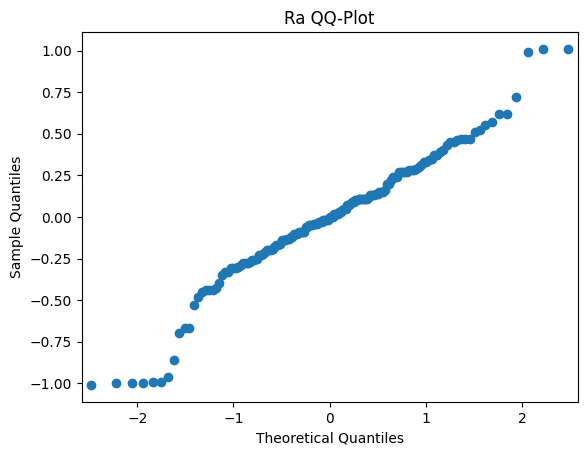

In [83]:
#from scipy import stats
import statsmodels.api as sm
plt.figure(figsize=(8,8))
sm.qqplot(np.array([round(float(r)/10,2) for r in Ra.values]))
#stats.probplot(Ra.values, dist="norm",plot=plt)
plt.title('Ra QQ-Plot')

Text(0.5, 1.0, 'Rg QQ-Plot')

<Figure size 800x800 with 0 Axes>

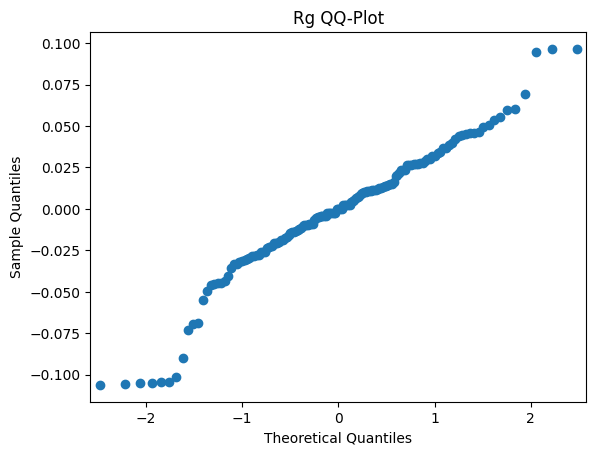

In [71]:
plt.figure(figsize=(8,8))
sm.qqplot(Rg)
plt.title('Rg QQ-Plot')

Text(0.5, 1.0, 'Rg QQ-plot')

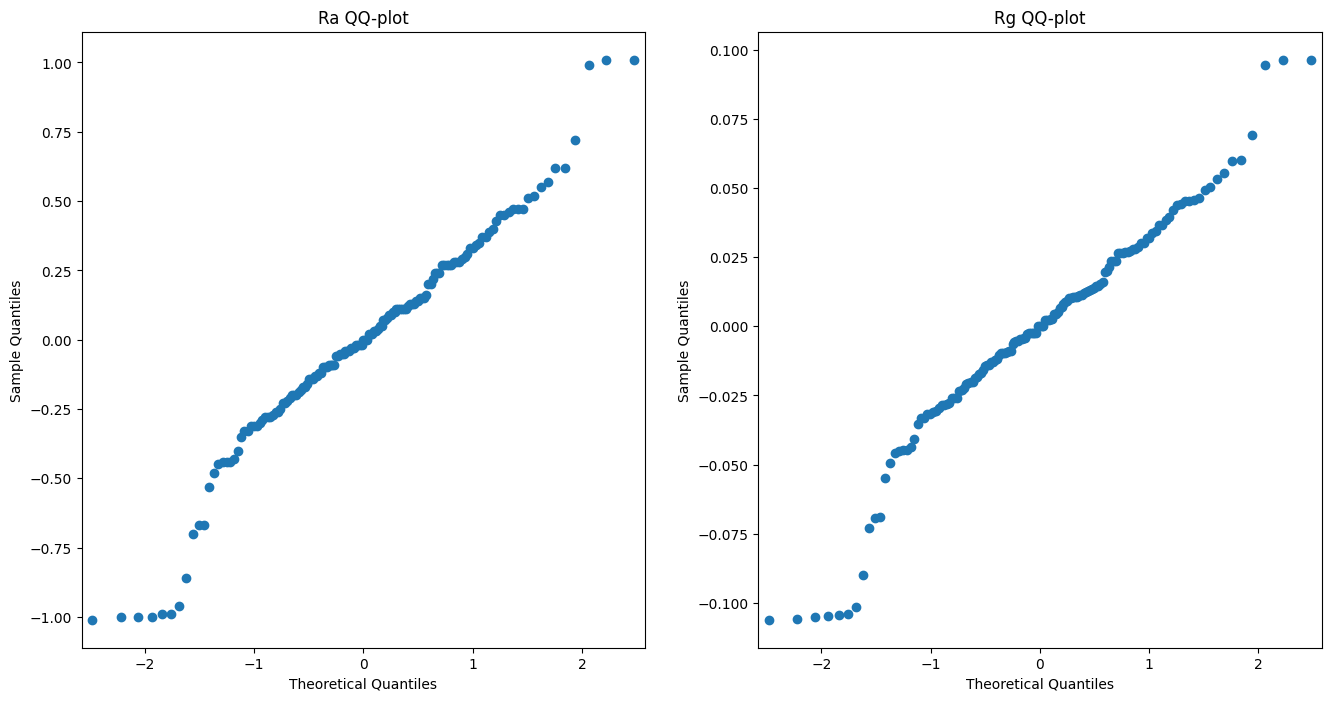

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

In [97]:
# 将算数收益率和几何收益率的QQ图放在一起比较
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
plt.figure(figsize=(8,8))
sm.qqplot(np.array([round(float(r)/10,2) for r in Ra.values]),ax=ax1)
ax1.set_title('Ra QQ-plot')
ax2 = fig.add_subplot(122)
plt.figure(figsize=(8,8))
sm.qqplot(Rg,ax=ax2)
ax2.set_title('Rg QQ-plot')

### 2. VaR的计算

In [28]:
# 使用算数收益率
Ra.head()

date
2018-01-03   -0.026999
2018-01-04   -0.006022
2018-01-05    0.003835
2018-01-08   -0.025594
2018-01-09    0.009252
Name: close, dtype: float64

#### 2. 1 历史模拟法计算VaR

In [100]:
VaRa_1_hs = np.percentile(np.array([round(float(r)/10,2) for r in Ra.values]), 1)            # 对return进行从小到大排序，取1%的分位点；计算99%的Daliy VaR；
VaRa_1_hs

-1.0

In [101]:
VaRa_5_hs = np.percentile(np.array([round(float(r)/10,2) for r in Ra.values]), 5)            # 对return进行从小到大排序，取5%的分位点；计算95%的Daliy VaR；
VaRa_5_hs

-0.78

In [102]:
VaRa_10_hs = VaRa_1_hs * np.sqrt(10)                    # 10天99% daily VaR，10天可以，100天误差太大；
VaRa_10_hs

-3.1622776601683795

Text(0.5, 1.0, 'Ra')

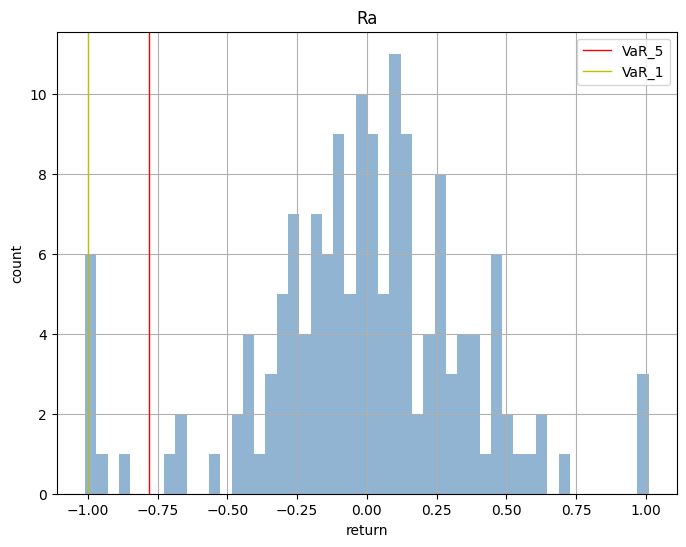

In [106]:
plt.figure(figsize= (8,6))
pd.Series([round(float(r)/10,2) for r in Ra.values]).hist(bins=50, alpha=0.6, color='steelblue')
plt.axvline(VaRa_5_hs, color='r', linewidth=1,label = 'VaR_5')
plt.axvline(VaRa_1_hs, color='y', linewidth=1,label = 'VaR_1')
plt.legend()
plt.xlabel('return')
plt.ylabel('count')
plt.title('Ra')

#### 2.2 加权历史模拟法计算VaR Aged-weighted HS

权重公式

$$w _{i} = \frac{\lambda ^{i-1} (1 - \lambda)}{1 - \lambda ^{n}}$$

其中
n表示观察历史数据的数据量  
i表示数据处于历史的周期位置
$\lambda$表示衰减速度


In [108]:
# 创建DataFrame
Ra_df = pd.DataFrame([round(float(r)/10,2) for r in Ra.values], columns=['Ra'], index=Ra.index)
Ra_df.head()

,Ra
date,
2024-01-03,-0.02
2024-01-04,0.13
2024-01-05,-0.23
2024-01-08,-0.10
2024-01-09,0.27


In [109]:
# 计算权重
Ra_df['order'] = np.arange(len(Ra_df),0,-1)
Ra_df.head()

,Ra,order
date,,
2024-01-03,-0.02,151
2024-01-04,0.13,150
2024-01-05,-0.23,149
2024-01-08,-0.10,148
2024-01-09,0.27,147


In [110]:
Ra_df.tail()

,Ra,order
date,,
2024-08-12,-0.43,5
2024-08-13,0.15,4
2024-08-14,-0.12,3
2024-08-15,1.01,2
2024-08-16,0.72,1


In [111]:
def calculate_weight(i, N, d):
    '''
    计算考虑衰减因子后的权重
    
    parameters:
    i: 顺序数
    N: 周期总长度
    d: 衰减速度（0.95-0.99）
    return:
    decay_factor i 
    '''
    w = d**(i-1)*(1-d)/(1-d**N)
    return w

In [112]:
i=4
calculate_weight(i, 10, 0.95)

0.10683452874688384

In [113]:
i=10
calculate_weight(i, 10, 0.95)

0.07853319572057772

In [114]:
# 计算权重
Ra_df['weight'] = Ra_df['order'].apply(calculate_weight, N=len(Ra_df), d=0.95)
Ra_df.head()

,Ra,order,weight
date,,,
2024-01-03,-0.02,151,0.000023
2024-01-04,0.13,150,0.000024
2024-01-05,-0.23,149,0.000025
2024-01-08,-0.10,148,0.000027
2024-01-09,0.27,147,0.000028


In [115]:
Ra_df.tail()

,Ra,order,weight
date,,,
2024-08-12,-0.43,5,0.040743
2024-08-13,0.15,4,0.042887
2024-08-14,-0.12,3,0.045145
2024-08-15,1.01,2,0.047521
2024-08-16,0.72,1,0.050022


计算分位数

In [116]:
from statsmodels.stats.weightstats import DescrStatsW

In [117]:
wdf = DescrStatsW(Ra_df['Ra'], weights=Ra_df['weight']) 

wdf.quantile([0.05,0.01])                              #取出数据本身带权重情况下的分位数；

p
0.05   -0.48
0.01   -0.67
dtype: float64

In [118]:
VaRa_1_hs

-1.0

In [119]:
VaRa_1_whs = wdf.quantile(0.01)             
VaRa_1_whs

p
0.01   -0.67
dtype: float64

In [120]:
VaRa_5_hs

-0.78

In [121]:
VaRa_5_whs = wdf.quantile(0.05)
VaRa_5_whs

p
0.05   -0.48
dtype: float64

#### 2.3  重抽样HS

In [122]:
# 使用numpy.random.choice()随机抽取300天的收益率
data_pool = [round(float(r)/10,2) for r in Ra.values]
data_pool[:10]

[-0.02, 0.13, -0.23, -0.1, 0.27, 0.09, 0.05, -0.14, 0.37, -0.09]

In [123]:
len(data_pool)

151

In [124]:
sample = np.random.choice(data_pool, size=50, replace=True)
sample

array([-0.04,  0.24, -0.19,  0.24, -0.31, -0.53,  0.62,  0.03, -1.01,
        0.46,  0.29, -0.14, -0.96,  0.15, -0.2 ,  0.2 , -0.44, -0.23,
       -0.31, -0.86,  0.11,  0.28, -0.4 ,  0.  , -0.02, -0.04, -0.09,
       -0.19, -0.04, -0.23, -0.09,  0.27,  0.99, -0.12,  0.11,  0.27,
        0.04,  0.72, -0.99,  0.02, -1.  ,  0.02,  0.33,  0.07, -0.33,
       -0.06, -0.06, -0.05, -0.14, -0.12])

In [125]:
# 计算样本对应VaR的值
VaR_5 = np.percentile(sample, 5)
VaR_1 = np.percentile(sample, 1)
f'50友好集团一日5%_VaR为 {VaR_5*100 : .2f}%, 1%_VaR:为 {VaR_1*100 : .2f}%'

'50ETF一日5%_VaR为 -97.65%, 1%_VaR:为 -100.51%'

In [126]:
def sample_VaR(data, size):
    """
    从data中抽取size大小的样本，计算样本的5%和1%VaR
    param data: 产生抽样数据的数据池
    param size: 抽取样本数量
    return: 返回模拟路径下的期末收益
    """
    sample = np.random.choice(data, size, replace=True)
    VaR_5 = np.percentile(sample, 5)
    VaR_1 = np.percentile(sample, 1)
    return (VaR_5, VaR_1)

sample_VaR(data_pool, size=300)

(-0.6794999999999999, -0.9901)

In [127]:
# 产生N条收益率路径
samples = [sample_VaR(data_pool, 300) for i in range(1000)]
samples[:10]

[(-0.8649999999999999, -1.0),
 (-0.86, -1.0),
 (-0.96, -1.0),
 (-0.9614999999999999, -1.0),
 (-0.67, -1.01),
 (-0.9614999999999999, -1.01),
 (-0.86, -1.01),
 (-0.67, -1.0),
 (-0.53, -1.0),
 (-0.7079999999999997, -1.0)]

In [128]:
len(samples)

1000

In [129]:
VaRs = pd.DataFrame(samples, columns=['VaR_5', 'VaR_1'])
VaRs.head()

,VaR_5,VaR_1
0,-0.8650,-1.00
1,-0.8600,-1.00
2,-0.9600,-1.00
3,-0.9615,-1.00
4,-0.6700,-1.01


In [130]:
VaR_mean = VaRs.mean()
VaR_mean

VaR_5   -0.802668
VaR_1   -1.001090
dtype: float64

Text(0, 0.5, 'count')

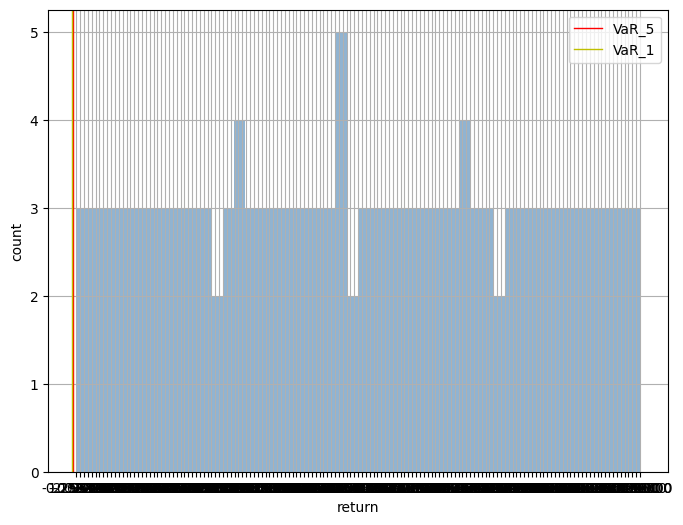

In [131]:
plt.figure(figsize= (8,6))
Ra.hist(bins=50, alpha=0.6, color='steelblue')
plt.axvline(VaR_mean.VaR_5, color='r', linewidth=1, label = 'VaR_5')
plt.axvline(VaR_mean.VaR_1, color='y', linewidth=1, label = 'VaR_1')
plt.xlabel('return')
plt.legend()
plt.ylabel('count')

#### 2.4. 参数法计算VaR

In [151]:
mu_1 = pd.DataFrame([round(float(r)/10,2) for r in Ra.values]).mean()                     # 观测期内每天的均值和标准差；
sigma_1 = pd.DataFrame([round(float(r)/10,2) for r in Ra.values]).std()

In [137]:
mu_1

0   -0.012053
dtype: float64

In [138]:
sigma_1

0    0.383907
dtype: float64

In [139]:
VaR_1_par = mu_1 - 2.33 * sigma_1
VaR_1_par

0   -0.906556
dtype: float64

In [140]:
mu_10 = mu_1 * 10

In [141]:
sigma_10 = sigma_1 * np.sqrt(10)

In [142]:
VaR_10_par = mu_10 - 2.33 * sigma_10
VaR_10_par

0   -2.949196
dtype: float64

#### 2.5 蒙特卡洛模拟法计算VaR

In [145]:
stock_price

date
2024-01-03    6.3800
2024-01-04    6.4600
2024-01-05    6.3100
2024-01-08    6.2500
2024-01-09    6.4200
               ...  
2024-08-12    4.0400
2024-08-13    4.1000
2024-08-14    4.0500
2024-08-15    4.4600
2024-08-16    4.7800
Name: close, Length: 151, dtype: object

In [198]:
s_0 = float(stock_price[-1])   
s_0# 用于蒙特卡洛模拟的初始股票价格；

4.78

In [199]:
# 定义一个函数，用于计算一次几何布朗运动的价格数据，single simualtion；
def GBM(s_0, mu, sigma, T ,n):
    """计算几何布朗运动的价格数据
    
    parameters:
        s_0: 开始价格
        mu: 观察期日收益率的均值
        sigma: 观察期日收益率的标准差
        T: 预测价格的周期长度,如预测下一天，T=1，预测后10天，T=10；
        n: 单次模拟的步数，步数越大，模拟得越精确；
    
    """
    # 计算delta_t
    delta_t = T/n
    
    # 创建一个空的列表用于储存价格数据
    simulated_price = [s_0]
    
    # 模拟价格走势
    for i in range(n):
        # 获取期初价格
        start_price = simulated_price[i]
        # 按照标准正太分布产生一个随机数
        epsilon = np.random.normal()
        # 根据几何布朗运动公式计算期末价格
        end_price = start_price + start_price * (mu*delta_t + sigma*epsilon*np.sqrt(delta_t))
        #print('end_price',end_price,np.shape(end_price))
        # 价格应大于0
        end_price = max(0, max(end_price))
        
        # 将算的结果存入列表
        simulated_price.append(end_price)
    
    return simulated_price

In [185]:
sim1 = GBM(s_0, mu_1, sigma_1,10,100)

end_price 0    4.66147
dtype: float64 (1,)
end_price 0    5.224886
dtype: float64 (1,)
end_price 0    4.797776
dtype: float64 (1,)
end_price 0    4.583137
dtype: float64 (1,)
end_price 0    4.641675
dtype: float64 (1,)
end_price 0    4.639064
dtype: float64 (1,)
end_price 0    4.225243
dtype: float64 (1,)
end_price 0    4.659736
dtype: float64 (1,)
end_price 0    4.185676
dtype: float64 (1,)
end_price 0    4.164483
dtype: float64 (1,)
end_price 0    3.738476
dtype: float64 (1,)
end_price 0    4.129445
dtype: float64 (1,)
end_price 0    5.497657
dtype: float64 (1,)
end_price 0    5.830299
dtype: float64 (1,)
end_price 0    6.041744
dtype: float64 (1,)
end_price 0    6.359384
dtype: float64 (1,)
end_price 0    6.229741
dtype: float64 (1,)
end_price 0    6.297802
dtype: float64 (1,)
end_price 0    7.016875
dtype: float64 (1,)
end_price 0    7.024104
dtype: float64 (1,)
end_price 0    6.621603
dtype: float64 (1,)
end_price 0    5.88211
dtype: float64 (1,)
end_price 0    5.911762
dtype: flo

In [186]:
sim1

[4.78,
 4.66147021786037,
 5.224886099220331,
 4.797776126783515,
 4.583137107799933,
 4.641675089157155,
 4.639063835470735,
 4.225243221851116,
 4.6597363089360115,
 4.1856764120386964,
 4.164483180422326,
 3.7384755185459007,
 4.129444531413803,
 5.497657425110999,
 5.830299416299723,
 6.041744008899803,
 6.359383853652431,
 6.229741468062163,
 6.297801893073697,
 7.016874700917524,
 7.024104370504495,
 6.621603014837396,
 5.882110131113041,
 5.911761878000221,
 5.703368556173791,
 5.674274818916611,
 6.447189634570365,
 5.70332707364689,
 5.274822646374437,
 4.704475128376751,
 4.261821007825798,
 3.0164484951324715,
 1.8961101049696751,
 1.7209094990965552,
 1.8398399210167005,
 2.187315463214199,
 1.9663426009906506,
 1.6927397218293447,
 1.350948256759295,
 1.2964043585934981,
 1.182499523518397,
 1.2372707197327129,
 1.1326084597787505,
 1.2308348499701351,
 1.1740690615246898,
 1.0611767119799866,
 1.213753011482214,
 1.1890900836416929,
 0.9958495630073972,
 0.898542619217044

In [187]:
sim1[-1]                        # 模拟后的最终的目标价格；

0.5952029938848786

In [188]:
len(sim1)

101

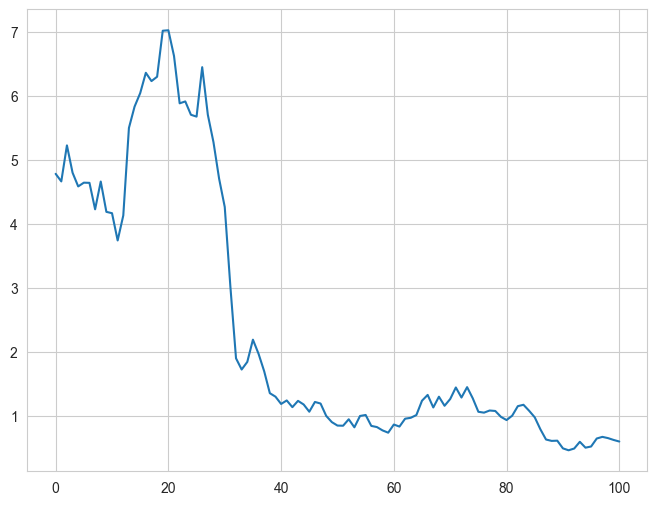

In [189]:
sim1 = pd.Series(sim1)
plt.figure(figsize=(8,6))
plt.plot(sim1)

In [190]:
# 绘图
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np
import matplotlib
import seaborn as sns
# 设置图像风格
sns.set_style('whitegrid')
# 设置绘图参数
NCURVES = 300
# np.random.seed(0)
# 产生几何布朗运动的数据
curves = [GBM(s_0, mu_1, sigma_1,1,100) for i in range(NCURVES)]

end_price 0    5.000219
dtype: float64 (1,)
end_price 0    4.958932
dtype: float64 (1,)
end_price 0    5.261242
dtype: float64 (1,)
end_price 0    5.485055
dtype: float64 (1,)
end_price 0    5.350055
dtype: float64 (1,)
end_price 0    5.523317
dtype: float64 (1,)
end_price 0    5.646088
dtype: float64 (1,)
end_price 0    5.276935
dtype: float64 (1,)
end_price 0    5.550099
dtype: float64 (1,)
end_price 0    5.598884
dtype: float64 (1,)
end_price 0    5.409366
dtype: float64 (1,)
end_price 0    5.516013
dtype: float64 (1,)
end_price 0    5.652399
dtype: float64 (1,)
end_price 0    5.694845
dtype: float64 (1,)
end_price 0    5.398888
dtype: float64 (1,)
end_price 0    5.41895
dtype: float64 (1,)
end_price 0    5.202639
dtype: float64 (1,)
end_price 0    4.879696
dtype: float64 (1,)
end_price 0    4.722698
dtype: float64 (1,)
end_price 0    4.796619
dtype: float64 (1,)
end_price 0    4.656237
dtype: float64 (1,)
end_price 0    4.828563
dtype: float64 (1,)
end_price 0    4.833071
dtype: fl

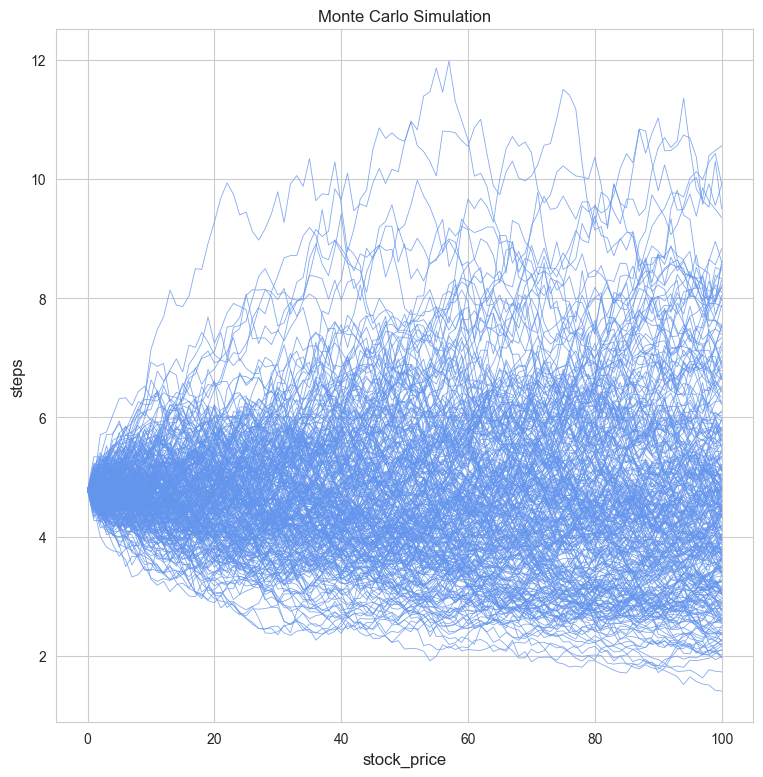

In [191]:
#绘图
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
lines = []
for idx in range(len(curves)):
    line = curves[idx]
    retLine, = ax.plot(line,
                       color='cornflowerblue',
                       alpha=0.8,
                       linewidth=0.6)

plt.xlabel('stock_price', fontsize='large')
plt.ylabel('steps', fontsize='large')
plt.title('Monte Carlo Simulation', fontsize='large')
plt.show()

In [200]:
# 产生1000个1天的模拟价格，取出它们的最终价格，并保存在simulated_prices_1空列表中
simulated_prices_1 = []
for i in range(1000):
    # 模拟一次几何布朗运动
    simulated_price = GBM(s_0, mu_1, sigma_1, 1,100)
    # 取出最终价格
    final_price = simulated_price[-1]
    simulated_prices_1.append(final_price)

In [201]:
simulated_prices_1[:10]

[4.1278923329148345,
 2.6234249732496173,
 5.895786582669526,
 1.9806963901390349,
 2.8516264264317095,
 2.782566218603636,
 8.987700017447738,
 5.730739971395482,
 4.683498540818366,
 7.5466705520603306]

In [204]:
simulated_return_1 = np.array(simulated_prices_1)/s_0-1           # 向量化运算，广播机制；
simulated_return_1

array([-0.1364242 , -0.45116632,  0.23342816, -0.58562837, -0.40342543,
       -0.41787318,  0.88027197,  0.19889958, -0.02018859,  0.57880137,
        0.08123598, -0.20886954,  0.77509279, -0.00801015, -0.15811016,
        0.0235685 , -0.19679196,  0.50210455, -0.05413563,  0.20285534,
       -0.43678936,  0.29353321,  0.56849795,  1.38625766, -0.46637463,
        0.5755604 , -0.61531944,  0.24925412, -0.34252356,  0.75965253,
       -0.35110146,  0.27455367, -0.26526514,  0.33249165, -0.34657915,
       -0.27542036, -0.22881297, -0.19860501,  0.18631747,  0.58955405,
       -0.01911211, -0.35667487,  0.13062737, -0.32892779, -0.28270057,
       -0.06062783,  0.17704285,  0.24152963, -0.42213015,  1.1083153 ,
        0.95127492,  0.1196547 , -0.12451147, -0.39563905,  0.13553649,
        0.42065877,  0.38553866, -0.09042118, -0.03433487, -0.16614723,
        0.37997602,  0.15433077,  0.77265512, -0.13493016, -0.55377478,
        0.15975909,  0.18382754, -0.13374485,  0.61646258, -0.23

In [205]:
VaR_1 = np.percentile(simulated_return_1, 1)
VaR_1

-0.6095338183720117

In [206]:
VaR_10 =  VaR_1 * np.sqrt(10)
VaR_10 

-1.9275151769549432

In [207]:
# 产生1000个10天的模拟价格，取出第10天的最终价格，并保存在simulated_prices_10空列表中
simulated_prices_10 = []
for i in range(1000):
    # 模拟一次几何布朗运动
    simulated_price = GBM(s_0, mu_1, sigma_1, 10,100)
    # 取出最终价格
    final_price = simulated_price[-1]
    simulated_prices_10.append(final_price)

In [208]:
simulated_prices_10[:10]

[0.11277241940502195,
 0.6236686727964207,
 5.207217099604171,
 6.847126259766118,
 0.9116412473773576,
 3.5462635638077544,
 2.559672771518637,
 8.50211565356721,
 9.997090440864353,
 0.3642808595668329]

In [210]:
simulated_return_10 = np.array(simulated_prices_10)/s_0-1

In [211]:
VaR_10 = np.percentile(simulated_return_10, 1)
VaR_10

-0.9738131534197871

思考——模型的改进：此处用的是历史波动率，可以对波动率再进行建模，以追求更准确的计算结果，如可以使用GARCH模型对波动率建模等；

找到更精确的一个递推式；

### 3. VaR衍生交易策略

In [212]:
Ra

date
2024-01-03    -0.156500
2024-01-04     1.253900
2024-01-05    -2.322000
2024-01-08    -0.950900
2024-01-09     2.720000
                ...    
2024-08-12    -4.265400
2024-08-13     1.485100
2024-08-14    -1.219500
2024-08-15    10.123500
2024-08-16     7.174900
Name: pctChg, Length: 151, dtype: object

([<matplotlib.axis.XTick at 0x1fc9c4df850>,
 [Text(0.0, 0, '0.0'),
  Text(30.2, 0, '30.2'),
  Text(60.4, 0, '60.4'),
  Text(90.6, 0, '90.6'),
  Text(120.8, 0, '120.8')])

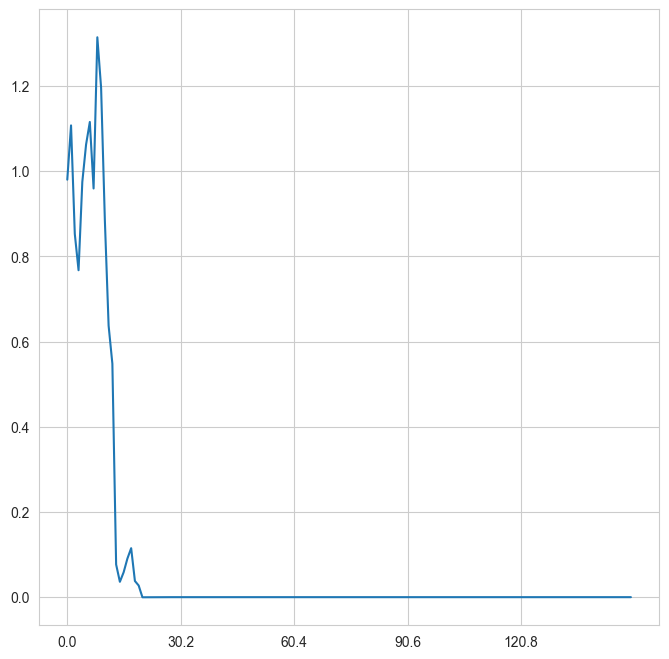

In [216]:
plt.figure(figsize=(8,8))
plt.plot((np.array([round(float(r)/10,2) for r in Ra.values])+1).cumprod(), label='stock')
plt.xticks(np.arange(0,len(Ra),len(Ra)/5))

In [226]:
# 参数法滚动计算VaR
N = 10
data = pd.DataFrame(
    {'close':stock_price,
     'Ra':[round(float(r)/10,2) for r in Ra.values]}
)


In [223]:
data.head()

,close,Ra
date,,
2024-01-03,6.3800,-0.02
2024-01-04,6.4600,0.13
2024-01-05,6.3100,-0.23
2024-01-08,6.2500,-0.10
2024-01-09,6.4200,0.27


In [228]:
data['Ra']

date
2024-01-03   -0.02
2024-01-04    0.13
2024-01-05   -0.23
2024-01-08   -0.10
2024-01-09    0.27
              ... 
2024-08-12   -0.43
2024-08-13    0.15
2024-08-14   -0.12
2024-08-15    1.01
2024-08-16    0.72
Name: Ra, Length: 151, dtype: float64

In [233]:
data['mean'] = data['Ra'].rolling(N).mean()
data['std'] = data['Ra'].rolling(N).std()
data

,close,Ra,mean,std,VaR_99,VaR_95
date,,,,,,
2024-01-03,6.3800,-0.02,NaN,NaN,0.469882,0.341899
2024-01-04,6.4600,0.13,NaN,NaN,0.469882,0.341899
2024-01-05,6.3100,-0.23,NaN,NaN,0.469882,0.341899
2024-01-08,6.2500,-0.10,NaN,NaN,0.469882,0.341899
2024-01-09,6.4200,0.27,NaN,NaN,0.469882,0.341899
...,...,...,...,...,...,...
2024-08-12,4.0400,-0.43,0.076,0.552775,1.361947,0.985234
2024-08-13,4.1000,0.15,0.094,0.551870,1.377841,1.001745
2024-08-14,4.0500,-0.12,0.053,0.550919,1.334630,0.959182


In [234]:
# 计算VaR值
from scipy.stats import norm
data['VaR_99'] = data['mean'] - norm.ppf(0.01,loc=0,scale=1) * data['std']
data['VaR_95'] = data['mean'] - norm.ppf(0.05,loc=0,scale=1) * data['std']
data.head()

,close,Ra,mean,std,VaR_99,VaR_95
date,,,,,,
2024-01-03,6.3800,-0.02,NaN,NaN,NaN,NaN
2024-01-04,6.4600,0.13,NaN,NaN,NaN,NaN
2024-01-05,6.3100,-0.23,NaN,NaN,NaN,NaN
2024-01-08,6.2500,-0.10,NaN,NaN,NaN,NaN
2024-01-09,6.4200,0.27,NaN,NaN,NaN,NaN


In [235]:
data.dropna(inplace=True)
data.head()

,close,Ra,mean,std,VaR_99,VaR_95
date,,,,,,
2024-01-16,6.6000,-0.09,0.033,0.187797,0.469882,0.341899
2024-01-17,6.4300,-0.26,0.009,0.209415,0.496171,0.353456
2024-01-18,6.2500,-0.28,-0.032,0.222800,0.486311,0.334474
2024-01-19,6.1600,-0.14,-0.023,0.215615,0.478596,0.331656
2024-01-22,5.6300,-0.86,-0.099,0.342424,0.697598,0.464238


In [236]:
# 假设自己单日承担最大亏损为10000元，可以计算再不同VaR下自己可以持仓的数量（假设自己资金没有上限）
data['position_99'] = 10000/data['VaR_99'].shift(1)
data['position_95'] = 10000/data['VaR_95'].shift(1)
data.head()

,close,Ra,mean,std,VaR_99,VaR_95,position_99,position_95
date,,,,,,,,
2024-01-16,6.6000,-0.09,0.033,0.187797,0.469882,0.341899,NaN,NaN
2024-01-17,6.4300,-0.26,0.009,0.209415,0.496171,0.353456,21281.959178,29248.415801
2024-01-18,6.2500,-0.28,-0.032,0.222800,0.486311,0.334474,20154.340265,28292.044987
2024-01-19,6.1600,-0.14,-0.023,0.215615,0.478596,0.331656,20562.967087,29897.692009
2024-01-22,5.6300,-0.86,-0.099,0.342424,0.697598,0.464238,20894.431108,30151.744384


In [237]:
# 计算策略累计盈亏
data['p_l_99'] = (data['Ra']*data['position_99']).cumsum()
data['p_l_95'] = (data['Ra']*data['position_95']).cumsum()
data.tail()

,close,Ra,mean,std,VaR_99,VaR_95,position_99,position_95,p_l_99,p_l_95
date,,,,,,,,,,
2024-08-12,4.0400,-0.43,0.076,0.552775,1.361947,0.985234,7419.900259,10090.829736,-60895.589890,-85265.720011
2024-08-13,4.1000,0.15,0.094,0.551870,1.377841,1.001745,7342.432191,10149.876475,-59794.225062,-83743.238540
2024-08-14,4.0500,-0.12,0.053,0.550919,1.334630,0.959182,7257.733830,9982.584078,-60665.153121,-84941.148629
2024-08-15,4.4600,1.01,0.164,0.623684,1.614907,1.189870,7492.711916,10425.551970,-53097.514086,-74411.341140
2024-08-16,4.7800,0.72,0.236,0.643881,1.733890,1.295089,6192.307578,8404.282736,-48639.052629,-68360.257570


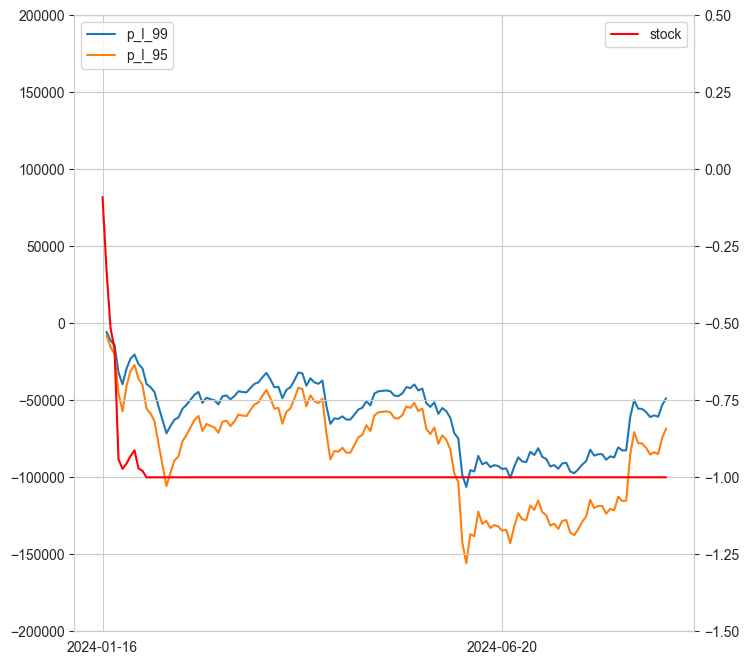

In [249]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
ax1.plot(data['p_l_99'], label='p_l_99')
ax1.plot(data['p_l_95'], label='p_l_95')
ax1.set_ylim(-200000,200000)
ax1.set_xticks(np.arange(0,len(Ra),100))
ax2 = ax1.twinx()
ax2.plot((data['Ra']+1).cumprod()-1, label='stock', color='r')
ax2.set_ylim(-1.5,0.5)
ax2.set_xticks(np.arange(0,len(Ra),100))
ax1.legend(loc=2)
ax2.legend(loc=0)